In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import googleapiclient.discovery
import configparser
cfg = configparser.ConfigParser()
cfg.read("secrets.ini")
my_key=cfg.get("default", "gtrends_apikey")

In [2]:
SERVER = 'https://trends.googleapis.com'
VERSION = 'v1beta'
DISCOVERY_URL_SUFFIX = '/$discovery/rest?version=' + VERSION
DISCOVERY_URL = SERVER + DISCOVERY_URL_SUFFIX

In [3]:
service = googleapiclient.discovery.build('trends',VERSION,developerKey=my_key
                                         , discoveryServiceUrl=DISCOVERY_URL)

In [5]:
res=service.getGraph(terms='apple').execute()

In [6]:
df = pd.DataFrame(res['lines'][0]['points'])

In [7]:
df.head()

,value,date
0,22,2004-01-01
1,20,2004-02-01
2,19,2004-03-01
3,19,2004-04-01
4,19,2004-05-01


<AxesSubplot: >

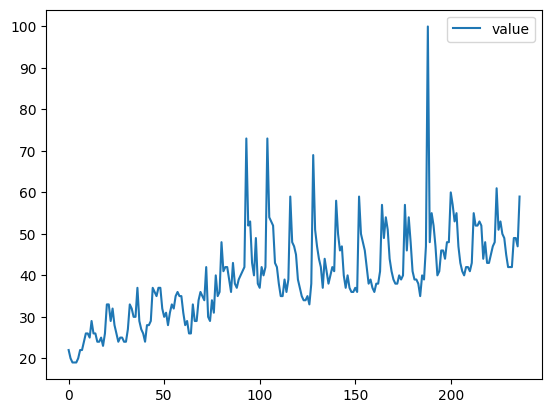

In [8]:
sns.lineplot(df)

In [9]:
df.columns

Index(['value', 'date'], dtype='object')

In [10]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot: xlabel='date', ylabel='value'>

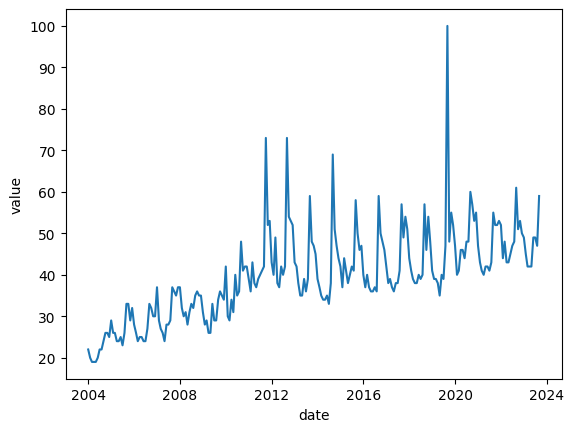

In [11]:
sns.lineplot(x=df['date'],y=df['value'])

In [13]:
help(service.getGraph)

Help on method method in module googleapiclient.discovery:

method(**kwargs) method of googleapiclient.discovery.Resource instance
    Returns a Graph of search volume per time points, normalized. For better insights, one could provide restrictions for time range, geographic region, etc.
    
    Args:
      restrictions_category: string, Please consult with the Trends Explore page for possible legal input here. Defaults to 'All Categories' when empty.
      restrictions_endDate: string, End date should be a month and a year in the format YYYY-MM e.g. 2010-01. Default value is the current month and year.
      restrictions_geo: string, Please refer to the ISO-3166-2 for the supported values.
      restrictions_property: string, The Google property of interest. Options are images/news/froogle(Shopping)/youtube, web is the default.
      restrictions_startDate: string, Start date should be a month and a year in the format YYYY-MM e.g. 2010-01. Default value is 2004-01.
      terms: strin

In [22]:
res = service.getGraph(terms=['cough','cold'],
                       restrictions_category=419, 
                       restrictions_geo='US-MI-563'
                       ).execute()
df = pd.DataFrame(res['lines'][0]['points'])

In [23]:
df

,value,date
0,100,2004-01-01
1,66,2004-02-01
2,50,2004-03-01
3,0,2004-04-01
4,0,2004-05-01
...,...,...
232,50,2023-05-01
233,35,2023-06-01
234,31,2023-07-01
235,32,2023-08-01


<AxesSubplot: >

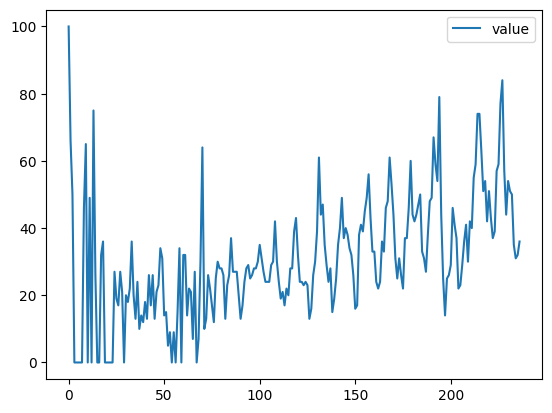

In [24]:
sns.lineplot(df)

In [27]:
help(googleapiclient.schema)

Help on module googleapiclient.schema in googleapiclient:

NAME
    googleapiclient.schema - Schema processing for discovery based APIs

DESCRIPTION
    Schemas holds an APIs discovery schemas. It can return those schema as
    deserialized JSON objects, or pretty print them as prototype objects that
    conform to the schema.
    
    For example, given the schema:
    
     schema = """{
       "Foo": {
        "type": "object",
        "properties": {
         "etag": {
          "type": "string",
          "description": "ETag of the collection."
         },
         "kind": {
          "type": "string",
          "description": "Type of the collection ('calendar#acl').",
          "default": "calendar#acl"
         },
         "nextPageToken": {
          "type": "string",
          "description": "Token used to access the next
             page of this result. Omitted if no further results are available."
         }
        }
       }
     }"""
    
     s = Schemas(schema)
     

In [28]:
res.stamps()

AttributeError: 'dict' object has no attribute 'stamps'

In [29]:
from googleapiclient.discovery import build

In [31]:
service = build('trends',VERSION, discoveryServiceUrl= DISCOVERY_URL, static_discovery=False)

In [32]:
service.getTimelinesForHealth()